# Exemple de chargement et visualisation des données PRONTO

Ce notebook sert d'exemple pour expliquer comment charger, visualiser et explorer rapidement les données brutes du projet PRONTO.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [14]:
# Définir le chemin vers le fichier de données (à adapter)
filepath = "../data/data1/Sansinjection.txt"

In [33]:
# Charger les données (format PRONTO)
# === Chargement brut ===
df = pd.read_csv(filepath, sep='\t', header=None, encoding='ISO-8859-1')
df.columns = ["Time", "BP", "Av BP", "HR", "D", "HR2", "Comment", "Extra"][:df.shape[1]]

# === Nettoyage ===
# Conversion des virgules en points, puis en float
for col in df.columns[:-2]:  # Toutes sauf "Comment" et "Extra"
    df[col] = df[col].astype(str).str.replace(',', '.', regex=True).astype(float)

# Supprimer les lignes incomplètes sur les colonnes numériques uniquement
df.dropna(subset=df.columns[:-2], inplace=True)

# Recalcul du temps (1 point tous les 5 ms)
df["Time"] = np.arange(len(df)) * 0.005


# === Afficher la durée totale disponible ===
temps_total = df["Time"].iloc[-1]
print(f"\n Temps total du signal : {temps_total:.2f} secondes")

# === Aperçu final ===
print(f"\n Les 10 premières lignes du fichier:")
df.head(10)




 Temps total du signal : 291.89 secondes

 Les 10 premières lignes du fichier:


,Time,BP,Av BP,HR,D,HR2,Comment,Extra
0,0.000,73.24,65.5386,122.71,0.000008,122.6655,#* dbut,NaN
1,0.005,72.51,65.5386,122.71,0.000008,122.6655,NaN,NaN
2,0.010,71.90,65.5386,122.71,0.000008,122.6655,NaN,NaN
3,0.015,71.38,65.5386,122.71,0.000007,122.6655,NaN,NaN
4,0.020,70.90,65.5386,122.71,0.000007,122.6655,NaN,NaN
5,0.025,70.44,65.5386,122.71,0.000007,122.6655,NaN,NaN
6,0.030,69.99,65.5386,122.71,0.000008,122.6655,NaN,NaN
7,0.035,69.57,65.5386,122.71,0.000008,122.6655,NaN,NaN
8,0.040,69.17,65.5386,122.71,0.000008,122.6655,NaN,NaN
9,0.045,68.72,65.5386,122.71,0.000009,122.6655,NaN,NaN


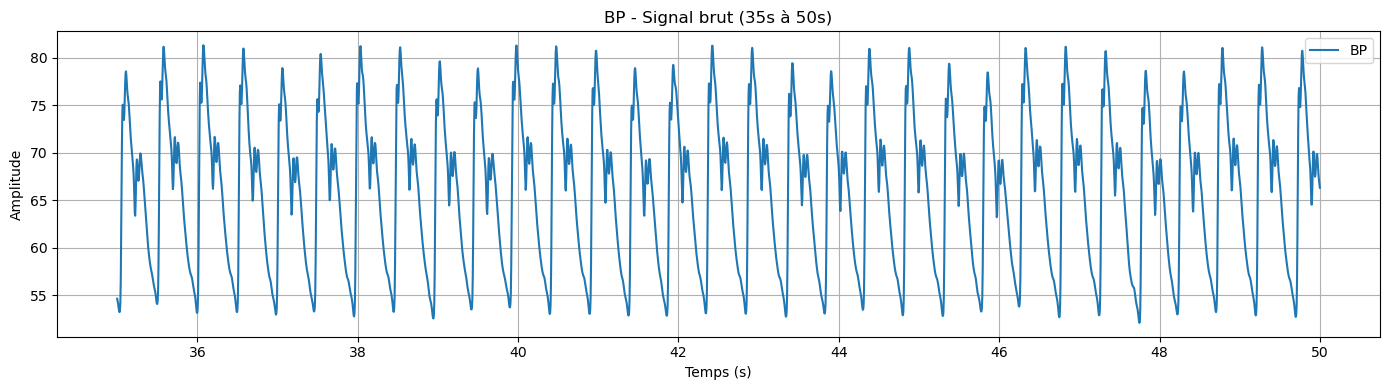

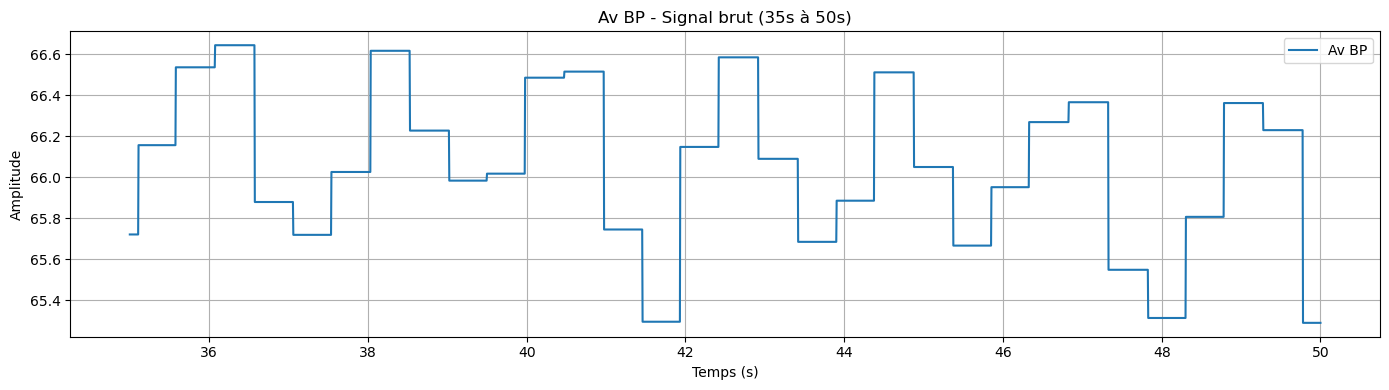

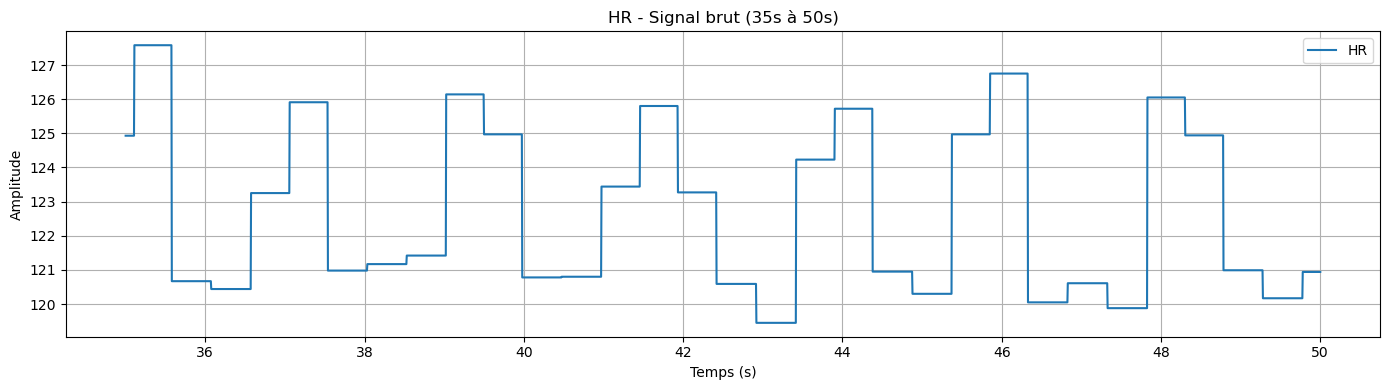

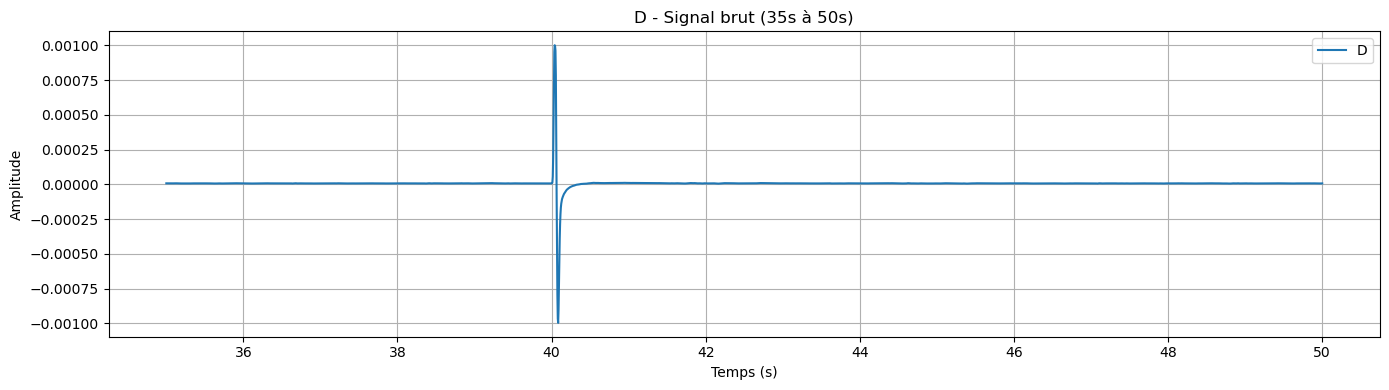

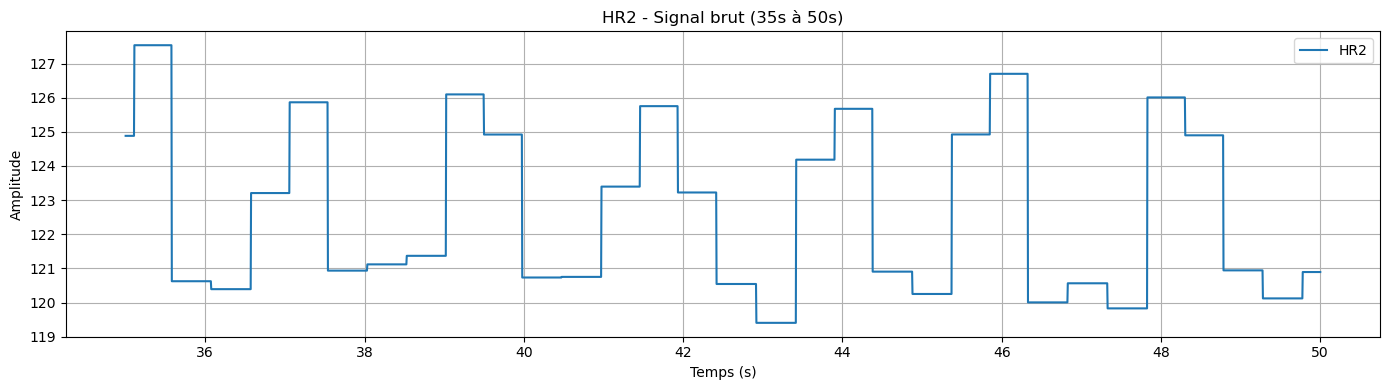

In [38]:
# === Définir l'intervalle temporel à afficher ===
start_time = 35    # en secondes
end_time = 50     # en secondes

# === Tracer un graphe par colonne pour cet intervalle ===
cols_to_plot = ["BP", "Av BP", "HR", "D", "HR2"]

# Filtrer le DataFrame pour ne garder que la plage de temps souhaitée
df_window = df[(df["Time"] >= start_time) & (df["Time"] <= end_time)]

for col in cols_to_plot:
    plt.figure(figsize=(14, 4))
    plt.plot(df_window["Time"], df_window[col], label=col)
    plt.title(f"{col} - Signal brut ({start_time}s à {end_time}s)")
    plt.xlabel("Temps (s)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
